In [ ]:
!pip install accelerate -U -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 354.7/354.7 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 30.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 27.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 16.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 52.0 MB/s eta 0:00:00


# 1)-Data Pre-processing

## install dataset Library

In [ ]:
!pip install datasets -q

## load and set dataset in pandas dataframe

In [ ]:
import pandas as pd
from datasets import load_dataset
dataset = pd.DataFrame({key: load_dataset("Sp1786/multiclass-sentiment-analysis-dataset")['train'][key] for key in ['text','sentiment']})
dataset_tst = pd.DataFrame({key: load_dataset("Sp1786/multiclass-sentiment-analysis-dataset")['test'][key] for key in ['text','sentiment']})

dataset.sample(5)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/1.72k [00:00<?, ?B/s]

train_df.csv:   0%|          | 0.00/3.56M [00:00<?, ?B/s]

val_df.csv:   0%|          | 0.00/601k [00:00<?, ?B/s]

test_df.csv:   0%|          | 0.00/586k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/31232 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/5205 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/5206 [00:00<?, ? examples/s]

,text,sentiment
1314,A post on my Warhammer blog for anyone interes...,neutral
10379,i hate it when a website says the ticket price...,negative
5936,gah! didn`t realize my meeting was from 9-12,neutral
8808,this weekend was a very relaxing one.. i was a...,positive
20294,please dont change anything in your site. I l...,positive


In [ ]:
dataset.shape,dataset_tst.shape

((31232, 2), (5206, 2))

In [ ]:
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
  text = dataset.iloc[:, 0].tolist()[:]  # First column to list
  label = dataset.iloc[:, 1].tolist() [:] # Second column to list

In [ ]:
  text_tst = dataset_tst.iloc[:, 0].tolist()[:]  # First column to list
  label_tst = dataset_tst.iloc[:, 1].tolist()[:]  # Second column to list

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import svm

In [ ]:
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder


In [ ]:
from sklearn.linear_model import LogisticRegression

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Top 10 most frequent words: [('app', 5170), ('im', 3090), ('day', 2488), ('like', 2329), ('good', 2309), ('time', 1910), ('get', 1848), ('love', 1788), ('dont', 1712), ('one', 1675)]


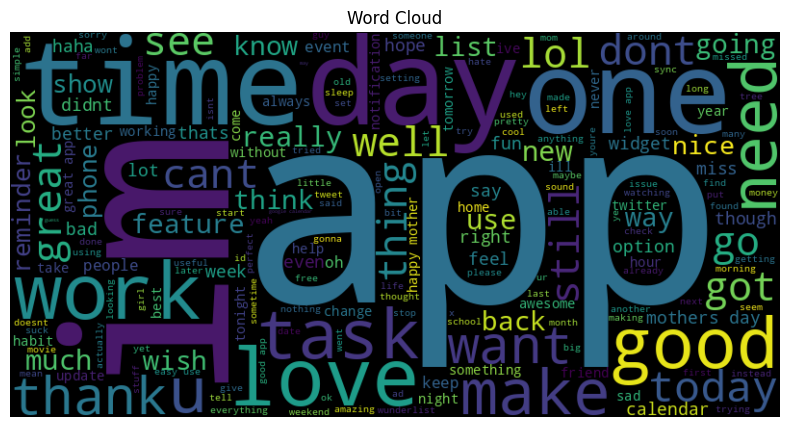

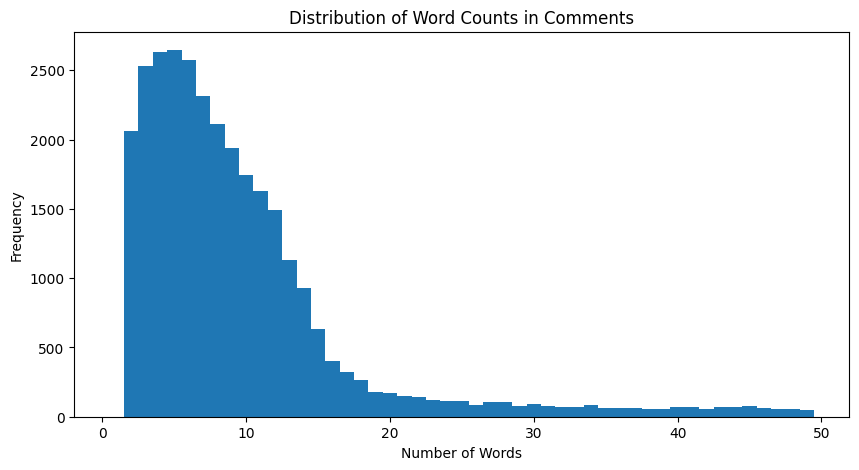

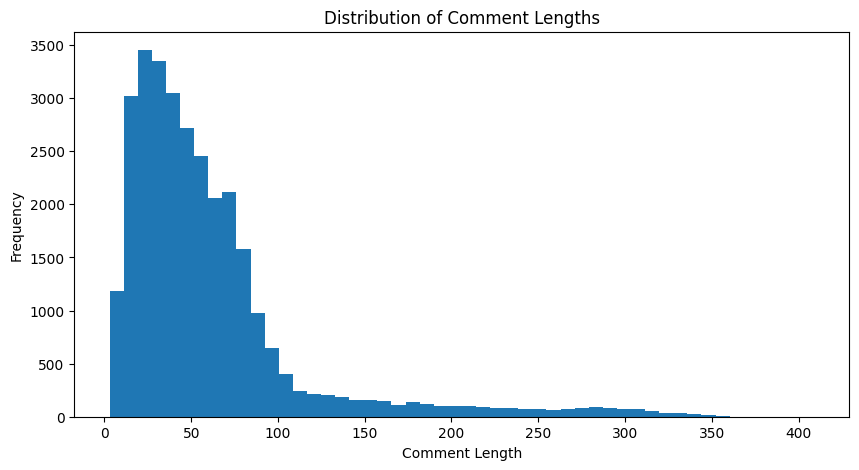

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.66527529318227
              precision    recall  f1-score   support

    negative       0.70      0.61      0.65      1514
     neutral       0.58      0.66      0.62      1837
    positive       0.75      0.72      0.73      1680

    accuracy                           0.67      5031
   macro avg       0.67      0.66      0.67      5031
weighted avg       0.67      0.67      0.67      5031



In [ ]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

def preprocess_text(text):
    """Preprocesses the input text."""

    if not isinstance(text, str):
        return ""

    # Remove URLs
    text = re.sub(r'http\S+', '', text)

    # Remove numbers
    text = re.sub(r'\d+', '', text)

    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Remove special characters, keep letters
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Remove diacritics (if needed, you might need a library for more robust handling)
    text = text.encode('ascii', 'ignore').decode('ascii')

    # Remove extra spaces
    text = ' '.join(text.split())

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    text = ' '.join(word for word in text.lower().split() if word not in stop_words)

    return text

def analyze_sentiment(text, sentiment_labels,text_tst, sentiment_labels_tst,):
    """Performs sentiment analysis and visualization."""

    processed_comments = [preprocess_text(comment) for comment in text]

    # Remove comments with length 1
    processed_comments, sentiment_labels = zip(*[(comment, label) for comment, label in zip(processed_comments, sentiment_labels) if len(comment.split()) > 1])

    processed_comments, sentiment_labels = zip(*[(comment, label) for comment, label in zip(processed_comments, sentiment_labels) if len(comment.split()) <50])

    processed_comments_tst = [preprocess_text(comment) for comment in text_tst]

    # Remove comments with length 1
    processed_comments_tst, sentiment_labels_tst = zip(*[(comment, label) for comment, label in zip(processed_comments_tst, sentiment_labels_tst) if len(comment.split()) > 1])
    processed_comments_tst, sentiment_labels_tst = zip(*[(comment, label) for comment, label in zip(processed_comments_tst, sentiment_labels_tst) if len(comment.split()) < 50])



    # Frequency Analysis
    all_words = ' '.join(processed_comments).split()
    word_counts = Counter(all_words)
    print("Top 10 most frequent words:", word_counts.most_common(10))

    # Word Cloud
    wordcloud = WordCloud(width=800, height=400).generate(' '.join(processed_comments))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title("Word Cloud")
    plt.show()

    # Occurrence Distribution
    comment_lengths = [len(comment.split()) for comment in processed_comments]
    plt.figure(figsize=(10, 5))
    plt.hist(comment_lengths, bins=range(1, max(comment_lengths) + 2), align='left')
    plt.title("Distribution of Word Counts in Comments")
    plt.xlabel("Number of Words")
    plt.ylabel("Frequency")
    plt.show()

    # Length Distribution
    comment_lengths_all = [len(comment) for comment in processed_comments]
    plt.figure(figsize=(10, 5))
    plt.hist(comment_lengths_all, bins=50)
    plt.title("Distribution of Comment Lengths")
    plt.xlabel("Comment Length")
    plt.ylabel("Frequency")
    plt.show()

    # Classification and Prediction
    df = pd.DataFrame({'comment': processed_comments, 'sentiment': sentiment_labels})
    df_tst= pd.DataFrame({'comment': processed_comments_tst, 'sentiment': sentiment_labels_tst})
    X_train, y_train = df['comment'], df['sentiment']
    X_test, y_test = df_tst['comment'], df_tst['sentiment']

    vectorizer = TfidfVectorizer()
    X_train_vec = vectorizer.fit_transform(X_train)
    X_test_vec = vectorizer.transform(X_test)




    model = LogisticRegression()
    # model = GaussianNB()
    # model = LinearDiscriminantAnalysis()
    # model = svm.SVC(kernel='rbf')
    # print(type(X_train_vec),type(y_train))
    # model = XGBClassifier()

    model.fit(X_train_vec.toarray(), y_train)

    y_pred = model.predict(X_test_vec.toarray())

    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))

    return model, vectorizer

model, vectorizer = analyze_sentiment(text, label,text_tst, label_tst)

